# Testing batch loader randomness

In [1]:
import s2sml.torch_s2s_dataset as torch_s2s_dataset
from torch.utils.data import DataLoader
import torch

In [2]:
# to modify custom dataset, use the location here (not code in repo)
torch_s2s_dataset

<module 's2sml.torch_s2s_dataset' from '/glade/work/kdagon/conda-envs/s2sml-env/lib/python3.10/site-packages/s2sml/torch_s2s_dataset.py'>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
import os

## Config settings

In [5]:
# Data: from KD randtest_719 config settings (region example)
homedir = '/glade/derecho/scratch/molina/' #conf["data"]["homedir"]

var = "tas2m" #conf["data"]["var"]
wks = 3 #conf["data"]["wks"]
dxdy = 31 #conf["data"]["dxdy"]
lat0 = -55.0 #conf["data"]["lat0"]
lon0 = 280.0 #conf["data"]["lon0"]
norm = "minmax" #conf["data"]["norm"]
norm_pixel = False #conf["data"]["norm_pixel"]
dual_norm = False #conf["data"]["dual_norm"]
region = "fixed" #conf["data"]["region"]

feattopo = True #conf["data"]["feat_topo"]
featcoord = True #conf["data"]["feat_coord"]

## Create dataset

In [6]:
train = torch_s2s_dataset.S2SDataset(
                week=wks,
                variable=var,
                norm=norm,
                norm_pixel=norm_pixel,
                dual_norm=dual_norm,
                region=region,
                minv=None,
                maxv=None,
                mini=None,
                maxi=None,
                mnv=None,
                stdv=None,
                mni=None,
                stdi=None,
                lon0=lon0,
                lat0=lat0,
                dxdy=dxdy,
                feat_topo=feattopo,
                feat_lats=featcoord,
                feat_lons=featcoord,
                startdt="1999-02-01",
                enddt="1999-12-31",
                #enddt="2000-12-31",
                #enddt="2014-12-31",
                homedir=homedir,
)

### Inspect some properties of `train`

In [7]:
# file directory
train.cesm_dir

'/glade/derecho/scratch/molina/cesm_tas2m_week3/'

In [8]:
# list of files
train.list_of_cesm

['/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990201.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990208.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990215.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990222.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990301.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990308.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990315.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990322.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990329.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990405.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990412.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990419.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990426.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_199905

In [9]:
# days of the month for week 3 leadtime
print(train.day_init, train.day_end)

15 21


In [10]:
# this only gets put in here after Dataloader step?
train.img_train

AttributeError: 'S2SDataset' object has no attribute 'img_train'

In [11]:
# example of how to index train (it is a list)
train[0]["input"].shape # dims are input channel x sample x lat x lon (or something similar)

(4, 1, 32, 32)

In [12]:
len(train.list_of_cesm)

48

In [13]:
# print out the values
for i in range(len(train.list_of_cesm)):
    print(train[i]["input"][3,0,0,0]) # last input channel (tas2m?) and the first spatial index

0.5087181329727173
0.5062133073806763
0.504371166229248
0.5024085640907288
0.5035187602043152
0.5023218989372253
0.4869505763053894
0.4903753399848938
0.4902275502681732
0.4775298535823822
0.48058339953422546
0.4723659157752991
0.46437421441078186
0.4619479179382324
0.47388046979904175
0.46676212549209595
0.4668988585472107
0.4664851725101471
0.4575706422328949
0.4487672746181488
0.4600772559642792
0.46168723702430725
0.4514658749103546
0.4451068341732025
0.44416600465774536
0.4464462697505951
0.4501613676548004
0.4569172263145447
0.4605066776275635
0.46429917216300964
0.47283023595809937
0.4600900709629059
0.463379830121994
0.4751553237438202
0.47687700390815735
0.470411479473114
0.45766374468803406
0.47154319286346436
0.47409868240356445
0.47838282585144043
0.48400989174842834
0.48804035782814026
0.4873875379562378
0.4954996705055237
0.506888210773468
0.5000887513160706
0.4955613613128662
0.5025650858879089


In [14]:
# The __len__ function returns the number of samples in our dataset.
train.__len__()

48

In [15]:
# The __getitem__ function loads and returns a sample from the dataset at the given index idx.
train.__getitem__(0)

{'input': array([[[[-1.67025251e-04, -1.67025251e-04, -1.67025251e-04, ...,
           -1.67025251e-04, -1.67025251e-04, -1.67025251e-04],
          [-1.67025251e-04, -1.67025251e-04, -1.67025251e-04, ...,
           -1.67025251e-04, -1.67025251e-04, -1.67025251e-04],
          [-1.67025251e-04, -1.67025251e-04, -1.67025251e-04, ...,
           -1.67025251e-04, -1.67025251e-04, -1.67025251e-04],
          ...,
          [-1.67025251e-04, -1.67025251e-04, -1.67025251e-04, ...,
            1.70076180e-01,  1.08780237e-01,  1.43036870e-01],
          [-1.67025251e-04, -1.67025251e-04, -1.67025251e-04, ...,
            1.38709897e-01,  1.63850811e-01,  1.11277225e-01],
          [-1.67025251e-04, -1.67025251e-04, -1.67025251e-04, ...,
            1.56188818e-01,  1.61336720e-01,  1.17605211e-01]]],
 
 
        [[[-5.64862549e-01, -5.78855455e-01, -5.92672050e-01, ...,
           -8.85139346e-01, -8.92538905e-01, -8.99666607e-01],
          [-5.63038230e-01, -5.76985955e-01, -5.90757966e-01

## Batch size and dataloader

In [16]:
train_batch_size = 32 #conf["trainer"]["train_batch_size"]

In [17]:
train_loader = DataLoader(
                train, batch_size=train_batch_size, shuffle=True, drop_last=True
)

### Print out values in a loop that grabs the batches (no seeds set)

In [20]:
iter(train_loader)

In [21]:
len(next(iter(train_loader)))

4

In [22]:
a, b, c, d = next(iter(train_loader))
print(a, b, c, d)

input label lmask index


tensor([0.4902, 0.5069, 0.5087, 0.4904, 0.4739, 0.4955, 0.4769, 0.4576, 0.4752,
        0.5023, 0.4741, 0.4634, 0.4451, 0.4880, 0.4784, 0.4619, 0.4668, 0.4515,
        0.4665, 0.5044, 0.4502, 0.5062, 0.4601, 0.4601, 0.4728, 0.4643, 0.4704,
        0.4464, 0.5024, 0.4442, 0.4577, 0.5001], dtype=torch.float64) tensor([ 8, 44,  0,  7, 14, 43, 34, 18, 33,  5, 38, 32, 23, 41, 39, 13, 15, 22,
        17,  2, 26,  1, 20, 31, 30, 29, 35, 25,  3, 24, 36, 45])


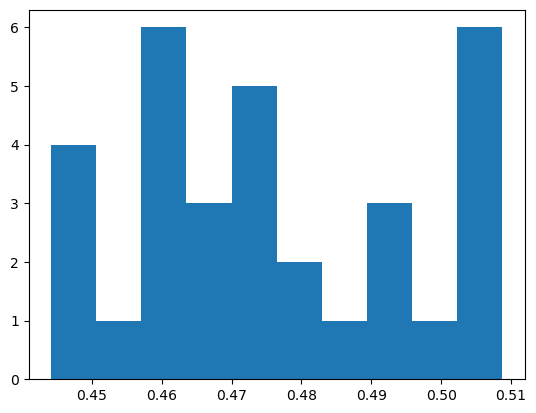

In [24]:
for data in train_loader:
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # select all the batches for the last input channel (tas2m?) and the first spatial index
    i = data["index"]
    print(x, i) 
    plt.hist(x)

### Values change each time you run this (notice that the histogram is different)

tensor([0.4728, 0.4515, 0.4442, 0.5035, 0.4601, 0.4902, 0.4605, 0.4724, 0.5024,
        0.4668, 0.4464, 0.4956, 0.4634, 0.5044, 0.4451, 0.5062, 0.4569, 0.4665,
        0.4870, 0.4840, 0.4904, 0.5023, 0.5069, 0.4643, 0.5001, 0.5026, 0.4752,
        0.4880, 0.4874, 0.4601, 0.4488, 0.4741], dtype=torch.float64) tensor([30, 22, 24,  4, 20,  8, 28, 11,  3, 15, 25, 46, 32,  2, 23,  1, 27, 17,
         6, 40,  7,  5, 44, 29, 45, 47, 33, 41, 42, 31, 19, 38])


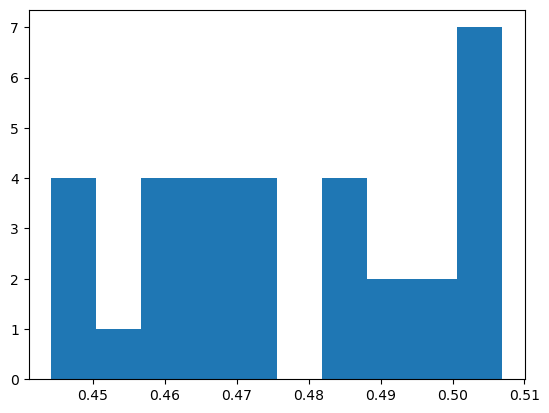

In [25]:
for data in train_loader:
    x = data["input"].squeeze(dim=2)[:,3,0,0]
    i = data["index"]
    print(x, i)
    plt.hist(x)

## Next test: match batch size to number of time samples

In [26]:
len(train.list_of_cesm) # 48 time samples

48

In [27]:
train_batch_size_v2 = 48

### New instance of dataloader with different batch size

In [28]:
train_loader_match = DataLoader(
    train, batch_size=train_batch_size_v2, shuffle=True, drop_last=True
)

In [30]:
# verify random sampling
train_loader_match.batch_sampler.sampler

In [32]:
# verify no generator set
train_loader_match.generator

In [33]:
# verify no worker_init_fn set
train_loader_match.worker_init_fn

tensor([0.4874, 0.4669, 0.4634, 0.4576, 0.4775, 0.5001, 0.4902, 0.5087, 0.4870,
        0.4451, 0.4769, 0.4724, 0.4643, 0.4806, 0.4704, 0.4784, 0.4715, 0.4668,
        0.4739, 0.5035, 0.4515, 0.4502, 0.4644, 0.4605, 0.5026, 0.4741, 0.4617,
        0.4577, 0.4956, 0.5044, 0.5069, 0.4880, 0.4601, 0.4955, 0.4752, 0.4488,
        0.5023, 0.4728, 0.4840, 0.4904, 0.5062, 0.4464, 0.4569, 0.4619, 0.4442,
        0.4601, 0.5024, 0.4665], dtype=torch.float64) tensor([42, 16, 32, 18,  9, 45,  8,  0,  6, 23, 34, 11, 29, 10, 35, 39, 37, 15,
        14,  4, 22, 26, 12, 28, 47, 38, 21, 36, 46,  2, 44, 41, 31, 43, 33, 19,
         5, 30, 40,  7,  1, 25, 27, 13, 24, 20,  3, 17])


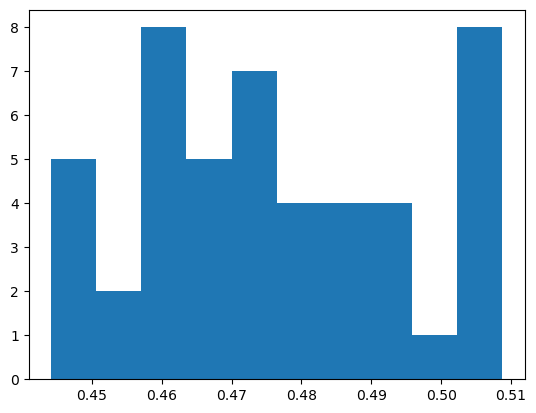

In [34]:
for data in train_loader_match:
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    i = data["index"]
    print(x,i) 
    plt.hist(x)

### plot is the same but the order is different

tensor([0.4502, 0.4741, 0.4784, 0.4870, 0.5069, 0.4488, 0.4577, 0.4464, 0.4451,
        0.4668, 0.4576, 0.4956, 0.4634, 0.4601, 0.5024, 0.4617, 0.5001, 0.5087,
        0.4769, 0.4806, 0.5062, 0.4619, 0.4880, 0.4601, 0.5023, 0.4643, 0.5035,
        0.4704, 0.4739, 0.4442, 0.4874, 0.4752, 0.4605, 0.4665, 0.4955, 0.5026,
        0.4515, 0.4728, 0.4840, 0.4715, 0.4902, 0.4644, 0.4569, 0.4724, 0.4904,
        0.4669, 0.5044, 0.4775], dtype=torch.float64) tensor([26, 38, 39,  6, 44, 19, 36, 25, 23, 15, 18, 46, 32, 31,  3, 21, 45,  0,
        34, 10,  1, 13, 41, 20,  5, 29,  4, 35, 14, 24, 42, 33, 28, 17, 43, 47,
        22, 30, 40, 37,  8, 12, 27, 11,  7, 16,  2,  9])


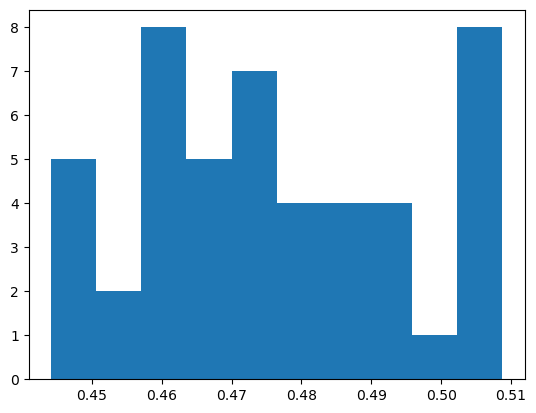

In [42]:
for data in train_loader_match:
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    i = data["index"]
    print(x,i) 
    plt.hist(x)

## Next test: try `shuffle=False` with yet another dataloader

In [36]:
train_loader_match_shuffle = DataLoader(
    train, batch_size=train_batch_size_v2, shuffle=False, drop_last=True
)

tensor([0.5087, 0.5062, 0.5044, 0.5024, 0.5035, 0.5023, 0.4870, 0.4904, 0.4902,
        0.4775, 0.4806, 0.4724, 0.4644, 0.4619, 0.4739, 0.4668, 0.4669, 0.4665,
        0.4576, 0.4488, 0.4601, 0.4617, 0.4515, 0.4451, 0.4442, 0.4464, 0.4502,
        0.4569, 0.4605, 0.4643, 0.4728, 0.4601, 0.4634, 0.4752, 0.4769, 0.4704,
        0.4577, 0.4715, 0.4741, 0.4784, 0.4840, 0.4880, 0.4874, 0.4955, 0.5069,
        0.5001, 0.4956, 0.5026], dtype=torch.float64) tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])


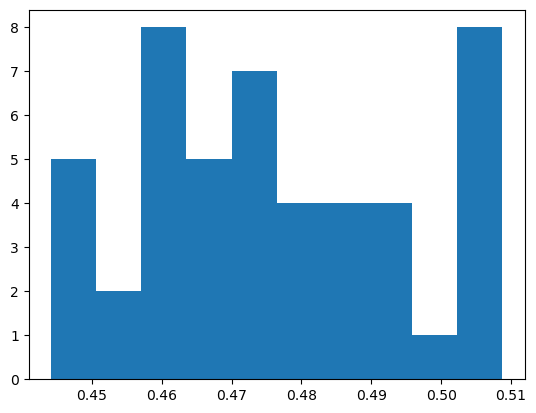

In [38]:
for data in train_loader_match_shuffle:
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    i = data["index"]
    print(x, i) 
    plt.hist(x)

### plot and order are the same, with the indices sampled in order

tensor([0.5087, 0.5062, 0.5044, 0.5024, 0.5035, 0.5023, 0.4870, 0.4904, 0.4902,
        0.4775, 0.4806, 0.4724, 0.4644, 0.4619, 0.4739, 0.4668, 0.4669, 0.4665,
        0.4576, 0.4488, 0.4601, 0.4617, 0.4515, 0.4451, 0.4442, 0.4464, 0.4502,
        0.4569, 0.4605, 0.4643, 0.4728, 0.4601, 0.4634, 0.4752, 0.4769, 0.4704,
        0.4577, 0.4715, 0.4741, 0.4784, 0.4840, 0.4880, 0.4874, 0.4955, 0.5069,
        0.5001, 0.4956, 0.5026], dtype=torch.float64) tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])


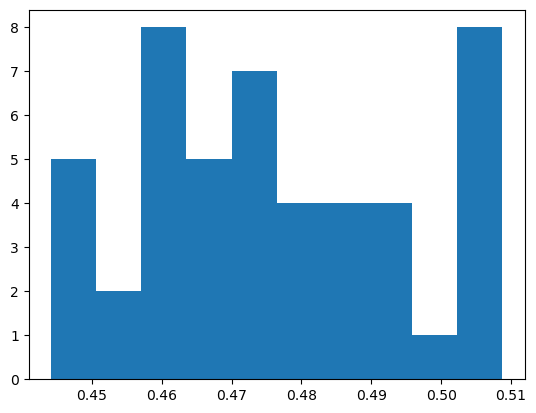

In [41]:
for data in train_loader_match_shuffle:
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    i = data["index"]
    print(x, i) 
    plt.hist(x)

## Next test: setting the seeds

In [47]:
#For reference from s2sml code...

#seed = 150
#random.seed(seed)
#os.environ["PYTHONHASHSEED"] = str(seed)
#np.random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed(seed)
#    torch.backends.cudnn.benchmark = True
#    torch.backends.cudnn.deterministic = True

In [43]:
# check cuda
torch.cuda.is_available()

False

In [44]:
# check initial seed
torch.initial_seed()

7027354768126268785

### Set all the seeds from `seed_everything` here in this function
See: https://pytorch.org/docs/stable/notes/randomness.html#dataloader

In [45]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    numpy.random.seed(worker_seed)
    random.seed(worker_seed)
    os.environ["PYTHONHASHSEED"] = str(worker_seed)
    torch.manual_seed(worker_seed)

In [46]:
g = torch.Generator()
g.manual_seed(0)

### New DataLoader instance with the seeds set

In [47]:
train_loader_rand = DataLoader(
    train, batch_size=train_batch_size, shuffle=True, 
    drop_last=True, worker_init_fn=seed_worker, generator=g
)

In [49]:
# still using random sampler
train_loader_rand.batch_sampler.sampler

In [50]:
# but with a specified generator
train_loader_rand.generator

In [51]:
# and worker_init_fn
train_loader_rand.worker_init_fn

<function __main__.seed_worker(worker_id)>

### Print out values in a loop that grabs the batches (seeds set)

torch.Size([32, 4, 32, 32])
tensor([0.5023, 0.5035, 0.4668, 0.4569, 0.4488, 0.4704, 0.4601, 0.4902, 0.4643,
        0.4601, 0.4634, 0.5087, 0.4515, 0.4442, 0.4769, 0.4577, 0.4874, 0.5069,
        0.4665, 0.4617, 0.4870, 0.4880, 0.4576, 0.4784, 0.4715, 0.4724, 0.4464,
        0.5001, 0.4904, 0.4955, 0.5026, 0.4728], dtype=torch.float64) tensor([ 5,  4, 15, 27, 19, 35, 31,  8, 29, 20, 32,  0, 22, 24, 34, 36, 42, 44,
        17, 21,  6, 41, 18, 39, 37, 11, 25, 45,  7, 43, 47, 30])


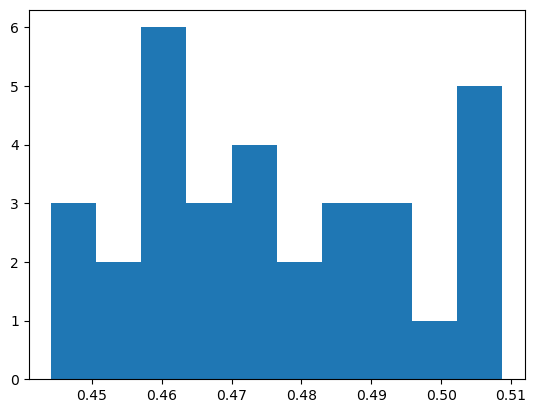

In [52]:
for i,data in enumerate(train_loader_rand):
    #print(i)
    print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    i = data["index"]
    print(x, i) 
    plt.hist(x)

### Note: the first sampled index is the same as the above case (5), and then it differs (not sure if that's meaningful?)

torch.Size([32, 4, 32, 32])
tensor([0.5023, 0.4769, 0.4752, 0.4442, 0.4634, 0.4806, 0.4902, 0.4488, 0.4577,
        0.4741, 0.4715, 0.4870, 0.4451, 0.4515, 0.4576, 0.4775, 0.5024, 0.4643,
        0.5087, 0.4617, 0.4955, 0.4724, 0.5001, 0.4904, 0.4739, 0.4644, 0.4784,
        0.5035, 0.4669, 0.4874, 0.4605, 0.4840], dtype=torch.float64) tensor([ 5, 34, 33, 24, 32, 10,  8, 19, 36, 38, 37,  6, 23, 22, 18,  9,  3, 29,
         0, 21, 43, 11, 45,  7, 14, 12, 39,  4, 16, 42, 28, 40])


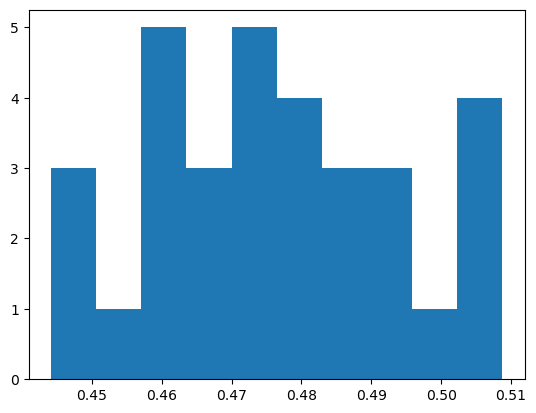

In [53]:
for i,data in enumerate(train_loader_rand):
    #print(i)
    print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    i = data["index"]
    print(x, i) 
    plt.hist(x)

### doesn't hold if you run a third time

tensor([0.4902, 0.4840, 0.4769, 0.4464, 0.4728, 0.4880, 0.4601, 0.4784, 0.4955,
        0.4605, 0.5062, 0.4665, 0.5023, 0.4569, 0.4442, 0.4617, 0.4704, 0.4904,
        0.4806, 0.4644, 0.4874, 0.5035, 0.4601, 0.4956, 0.4577, 0.4752, 0.4741,
        0.5069, 0.4775, 0.4634, 0.5087, 0.4669], dtype=torch.float64) tensor([ 8, 40, 34, 25, 30, 41, 31, 39, 43, 28,  1, 17,  5, 27, 24, 21, 35,  7,
        10, 12, 42,  4, 20, 46, 36, 33, 38, 44,  9, 32,  0, 16])


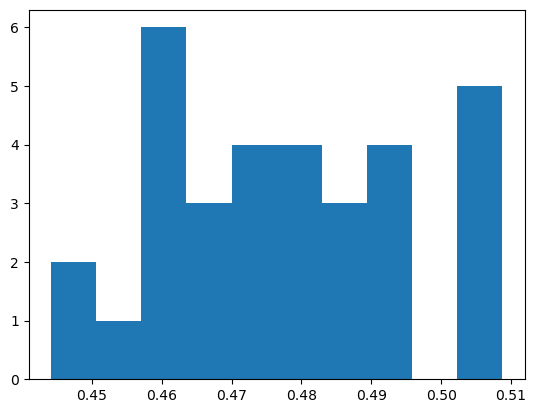

In [54]:
for i,data in enumerate(train_loader_rand):
    #print(i)
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    i = data["index"]
    print(x, i) 
    plt.hist(x)

### Try with the modified batch size

In [55]:
train_loader_rand_match = DataLoader(
    train, batch_size=train_batch_size_v2, shuffle=True, 
    drop_last=True, worker_init_fn=seed_worker, generator=g
)

torch.Size([48, 4, 32, 32])
tensor([0.4451, 0.4669, 0.4605, 0.4601, 0.5035, 0.4634, 0.4502, 0.4577, 0.4488,
        0.4464, 0.4704, 0.5024, 0.5087, 0.4956, 0.4442, 0.4739, 0.4806, 0.5023,
        0.4644, 0.4715, 0.4724, 0.4515, 0.4741, 0.4775, 0.4643, 0.5062, 0.4576,
        0.4752, 0.4668, 0.4902, 0.4569, 0.4874, 0.4870, 0.4784, 0.4619, 0.5026,
        0.4904, 0.4769, 0.4728, 0.4840, 0.4601, 0.4617, 0.4955, 0.5001, 0.4665,
        0.5069, 0.4880, 0.5044], dtype=torch.float64) tensor([23, 16, 28, 31,  4, 32, 26, 36, 19, 25, 35,  3,  0, 46, 24, 14, 10,  5,
        12, 37, 11, 22, 38,  9, 29,  1, 18, 33, 15,  8, 27, 42,  6, 39, 13, 47,
         7, 34, 30, 40, 20, 21, 43, 45, 17, 44, 41,  2])


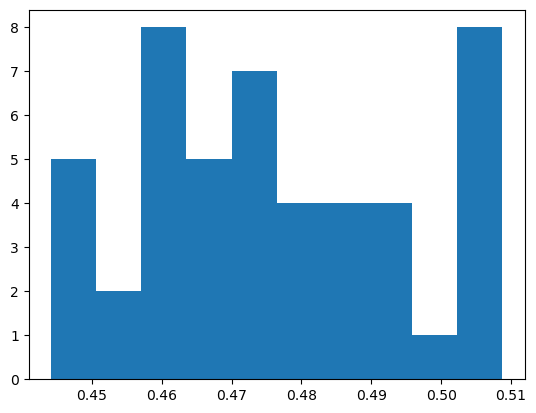

In [56]:
for i,data in enumerate(train_loader_rand_match):
    #print(i)
    print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    i = data["index"]
    print(x, i) 
    plt.hist(x)

### Histogram is the same (as expected) but the order is still different, and the first index is no longer the same

torch.Size([48, 4, 32, 32])
tensor([0.5069, 0.4728, 0.4569, 0.4617, 0.5062, 0.4601, 0.4775, 0.4643, 0.4451,
        0.4669, 0.4904, 0.4502, 0.4769, 0.4880, 0.4741, 0.4665, 0.4644, 0.4605,
        0.4704, 0.4902, 0.4752, 0.4576, 0.4464, 0.4739, 0.4806, 0.5026, 0.4955,
        0.4784, 0.4577, 0.4874, 0.5024, 0.4488, 0.4724, 0.4956, 0.4619, 0.4634,
        0.4840, 0.5001, 0.4515, 0.4601, 0.4442, 0.4715, 0.4668, 0.5087, 0.5035,
        0.5023, 0.5044, 0.4870], dtype=torch.float64) tensor([44, 30, 27, 21,  1, 20,  9, 29, 23, 16,  7, 26, 34, 41, 38, 17, 12, 28,
        35,  8, 33, 18, 25, 14, 10, 47, 43, 39, 36, 42,  3, 19, 11, 46, 13, 32,
        40, 45, 22, 31, 24, 37, 15,  0,  4,  5,  2,  6])


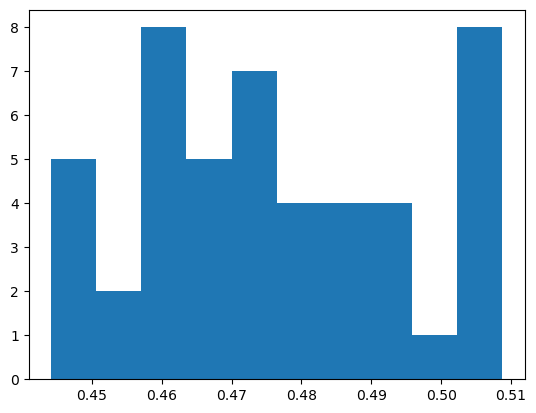

In [57]:
for i,data in enumerate(train_loader_rand_match):
    #print(i)
    print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    i = data["index"]
    print(x, i) 
    plt.hist(x)

### Thoughts: changing the sampler parameter to DataLoader may help with this, but you can't use that when `shuffle=True`
https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler